In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Sklearn
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
ebola= pd.read_csv('Ebola/ebola_2014_2016_clean2.csv')
ebola

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths",days_dif,start date
0,Guinea,8/29/2014,648.0,430,0,8/29/2014
1,Nigeria,8/29/2014,19.0,7,0,8/29/2014
2,Sierra Leone,8/29/2014,1026.0,422,0,8/29/2014
3,Liberia,8/29/2014,1378.0,694,0,8/29/2014
4,Sierra Leone,9/5/2014,1261.0,491,7,8/29/2014
...,...,...,...,...,...,...
2480,Liberia,3/23/2016,10666.0,4806,572,8/29/2014
2481,Italy,3/23/2016,1.0,0,572,8/29/2014
2482,Liberia,3/23/2016,5.0,4,572,8/29/2014
2483,Nigeria,3/23/2016,20.0,8,572,8/29/2014


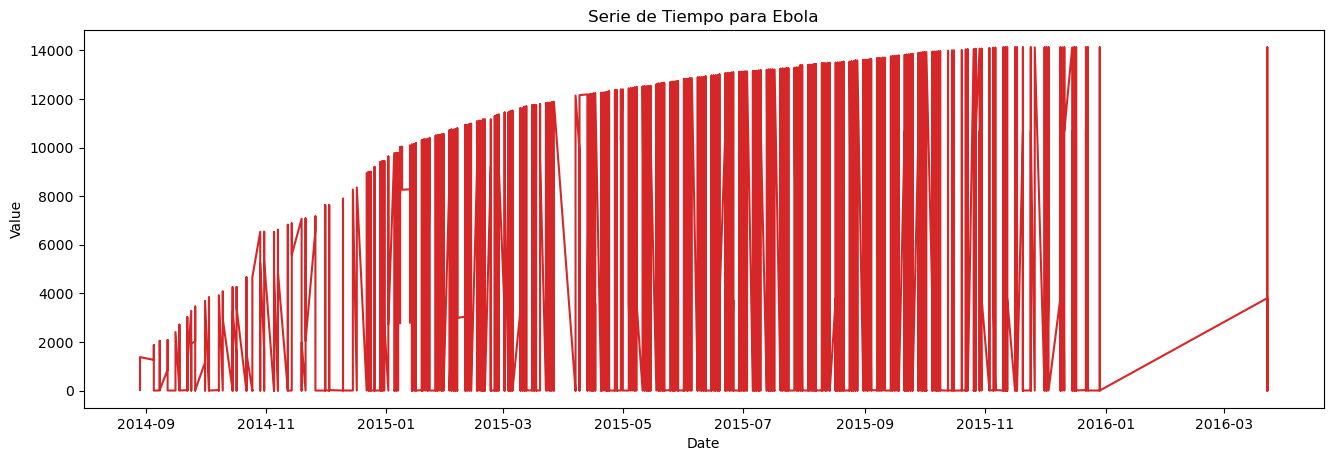

In [2]:
import matplotlib.pyplot as plt
df = pd.read_csv('Ebola/ebola_2014_2016_clean2.csv', parse_dates=['Date'], index_col='Date')
df.rename(columns={'Cumulative no. of confirmed, probable and suspected cases': 'confirmed', 'Cumulative no. of confirmed, probable and suspected deaths': 'death'}, inplace=True)

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.confirmed, title='Serie de Tiempo para Ebola')    

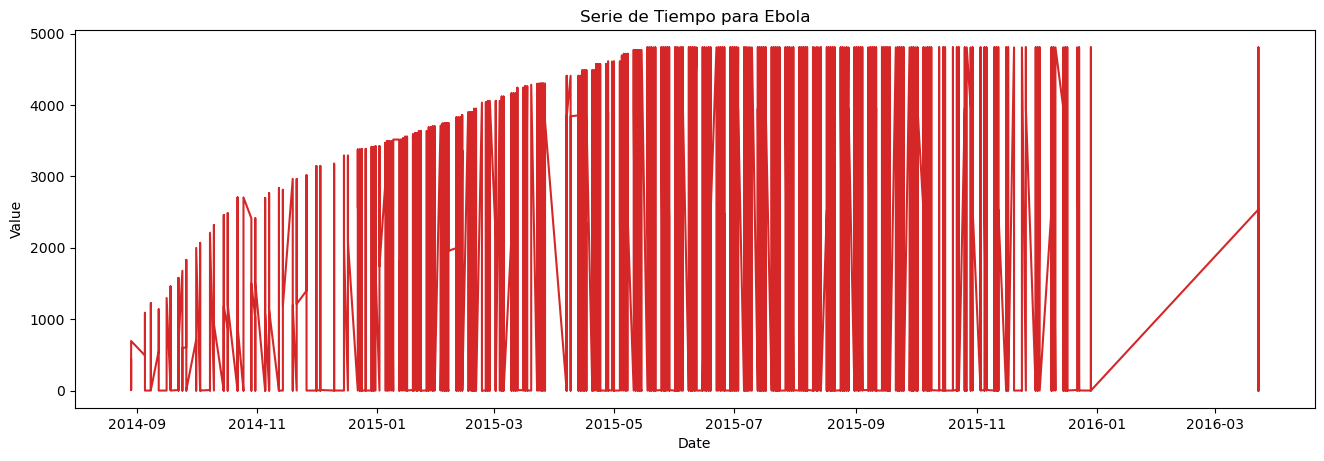

In [3]:
plot_df(df, x=df.index, y=df.death, title='Serie de Tiempo para Ebola')

In [4]:
df.Country

Date
2014-08-29                      Guinea
2014-08-29                     Nigeria
2014-08-29                Sierra Leone
2014-08-29                     Liberia
2014-09-05                Sierra Leone
                        ...           
2016-03-23                     Liberia
2016-03-23                       Italy
2016-03-23                     Liberia
2016-03-23                     Nigeria
2016-03-23    United States of America
Name: Country, Length: 2485, dtype: object

In [5]:
confirmado_por_pais =  df['Country']=='Guinea'
confirmado_por_pais = df[confirmado_por_pais]
confirmado_por_pais

,Country,confirmed,death,days_dif,start date
Date,,,,,
2014-08-29,Guinea,648.0,430,0,8/29/2014
2014-09-05,Guinea,812.0,517,7,8/29/2014
2014-09-08,Guinea,862.0,555,10,8/29/2014
2014-09-12,Guinea,861.0,557,14,8/29/2014
2014-09-16,Guinea,936.0,595,18,8/29/2014
...,...,...,...,...,...
2015-12-17,Guinea,3805.0,2536,475,8/29/2014
2015-12-22,Guinea,3804.0,2536,480,8/29/2014
2015-12-23,Guinea,3804.0,2536,481,8/29/2014


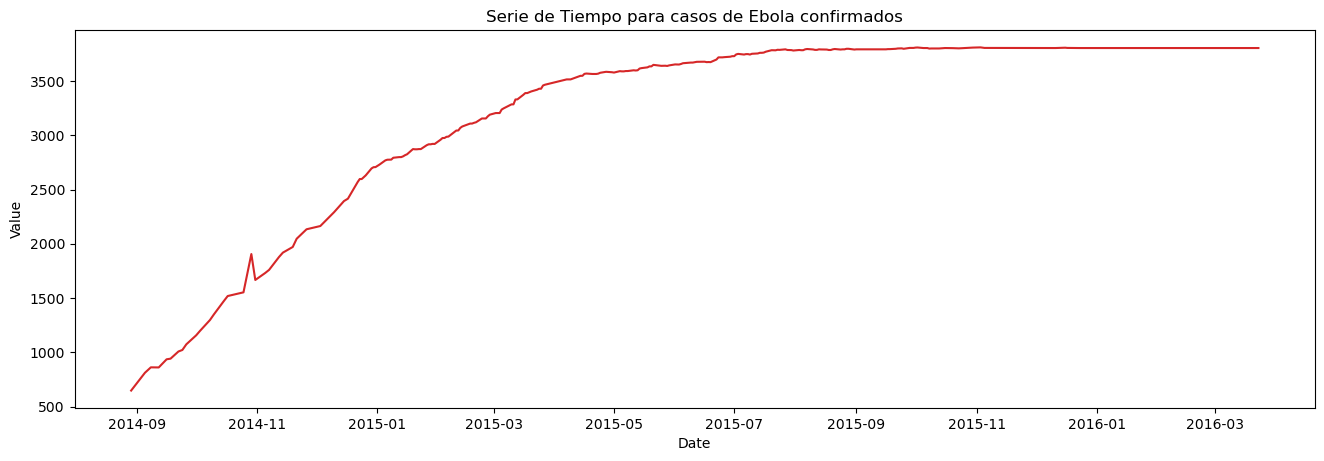

In [6]:
plot_df(df, x=confirmado_por_pais.index, y=confirmado_por_pais.confirmed, title='Serie de Tiempo para casos de Ebola confirmados')   

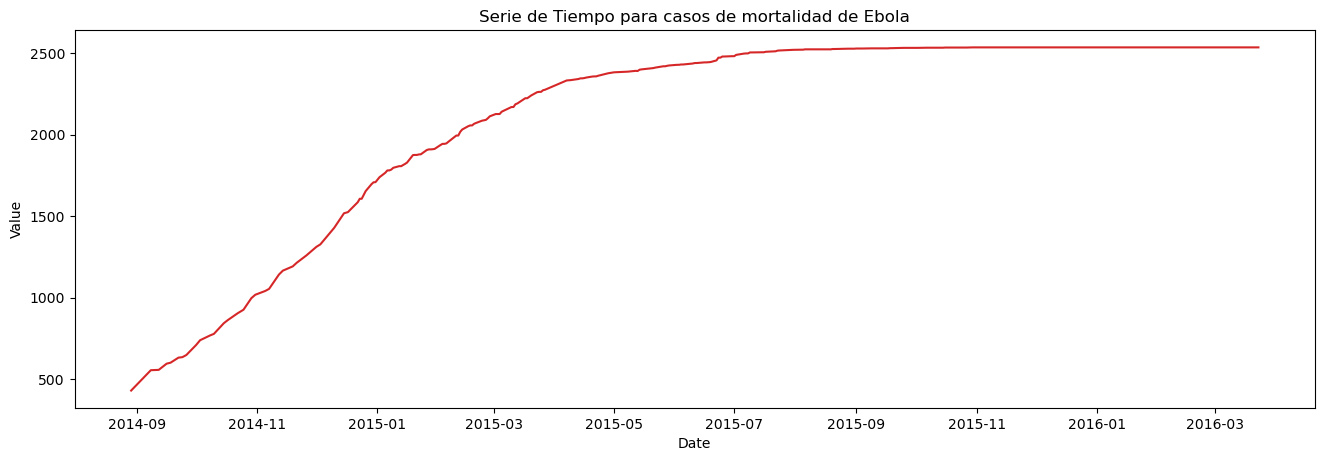

In [7]:
plot_df(df, x=confirmado_por_pais.index, y=confirmado_por_pais.death, title='Serie de Tiempo para casos de mortalidad de Ebola')  

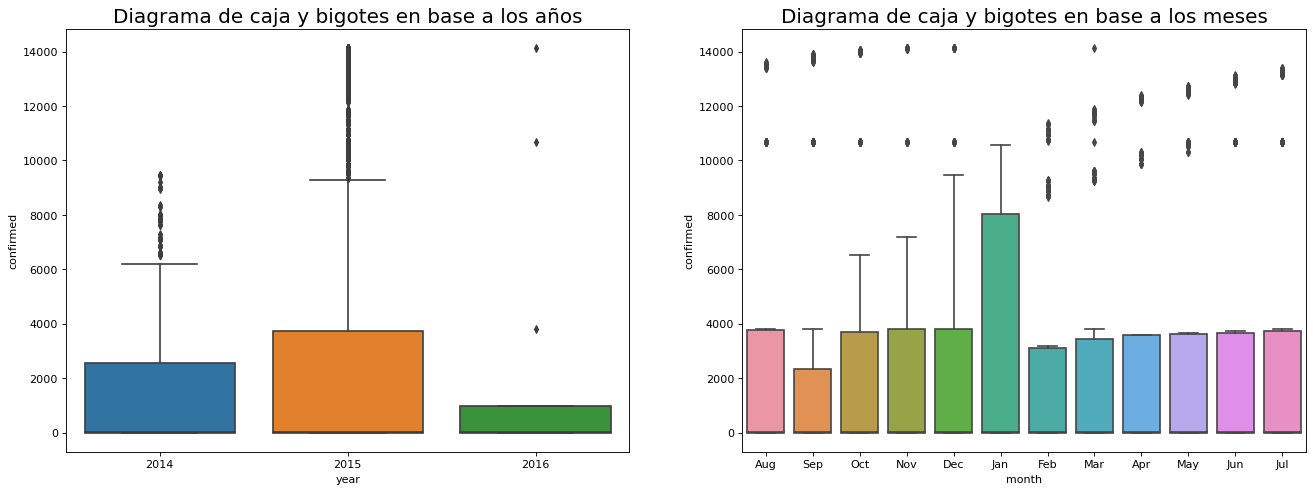

In [8]:
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='confirmed', data=df, ax=axes[0])
sns.boxplot(x='month', y='confirmed', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Diagrama de caja y bigotes en base a los años', fontsize=18); 
axes[1].set_title('Diagrama de caja y bigotes en base a los meses', fontsize=18)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.confirmed.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -21.543737
p-value: 0.000000


In [10]:
df

,Date,Country,confirmed,death,days_dif,start date,year,month
0,2014-08-29,Guinea,648.0,430,0,8/29/2014,2014,Aug
1,2014-08-29,Nigeria,19.0,7,0,8/29/2014,2014,Aug
2,2014-08-29,Sierra Leone,1026.0,422,0,8/29/2014,2014,Aug
3,2014-08-29,Liberia,1378.0,694,0,8/29/2014,2014,Aug
4,2014-09-05,Sierra Leone,1261.0,491,7,8/29/2014,2014,Sep
...,...,...,...,...,...,...,...,...
2480,2016-03-23,Liberia,10666.0,4806,572,8/29/2014,2016,Mar
2481,2016-03-23,Italy,1.0,0,572,8/29/2014,2016,Mar
2482,2016-03-23,Liberia,5.0,4,572,8/29/2014,2016,Mar
2483,2016-03-23,Nigeria,20.0,8,572,8/29/2014,2016,Mar


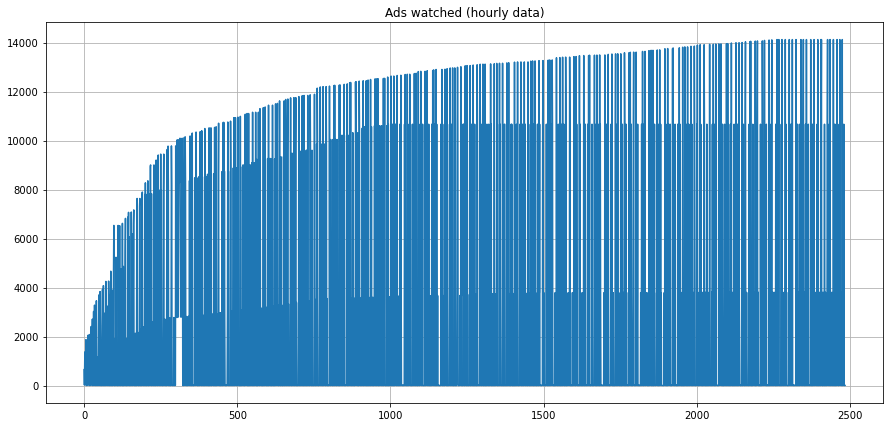

In [11]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

ads = df
ads = ads.dropna()
plt.figure(figsize=(15, 7))
plt.plot(ads.confirmed)
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

In [12]:
series = df.dropna()
series

,Date,Country,confirmed,death,days_dif,start date,year,month
0,2014-08-29,Guinea,648.0,430,0,8/29/2014,2014,Aug
1,2014-08-29,Nigeria,19.0,7,0,8/29/2014,2014,Aug
2,2014-08-29,Sierra Leone,1026.0,422,0,8/29/2014,2014,Aug
3,2014-08-29,Liberia,1378.0,694,0,8/29/2014,2014,Aug
4,2014-09-05,Sierra Leone,1261.0,491,7,8/29/2014,2014,Sep
...,...,...,...,...,...,...,...,...
2480,2016-03-23,Liberia,10666.0,4806,572,8/29/2014,2016,Mar
2481,2016-03-23,Italy,1.0,0,572,8/29/2014,2016,Mar
2482,2016-03-23,Liberia,5.0,4,572,8/29/2014,2016,Mar
2483,2016-03-23,Nigeria,20.0,8,572,8/29/2014,2016,Mar


In [13]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(ads.confirmed, 24) # prediction for the last observed day (past 24 hours)

2386.7916666666665

In [16]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

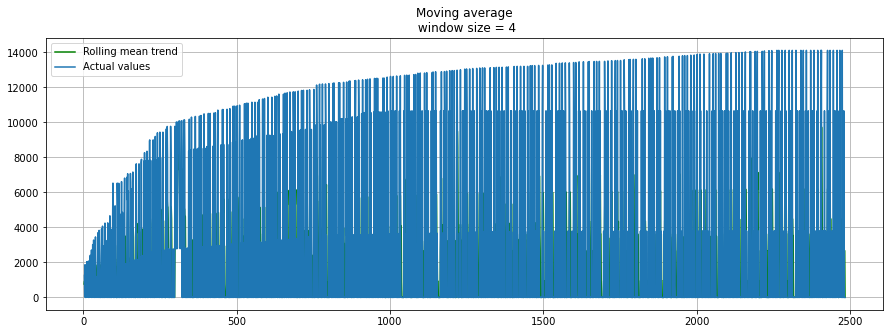

In [17]:
plotMovingAverage(ads.confirmed, 4) 

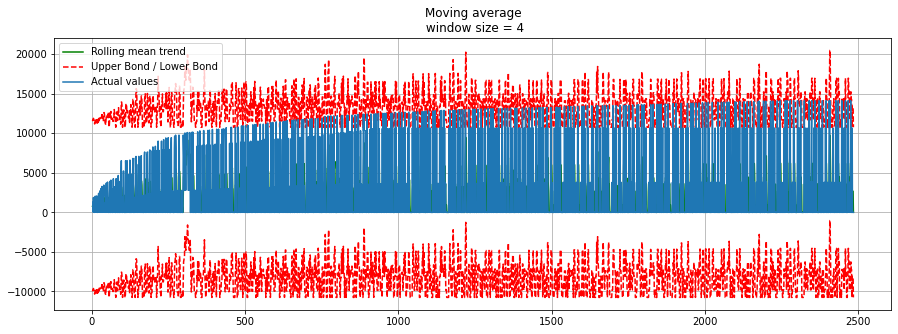

In [18]:
plotMovingAverage(ads.confirmed, 4, plot_intervals=True)

In [19]:
ads_anomaly = ads.confirmed.copy()
ads_anomaly.iloc[-20] = ads_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads 

AttributeError: 'Series' object has no attribute 'columns'

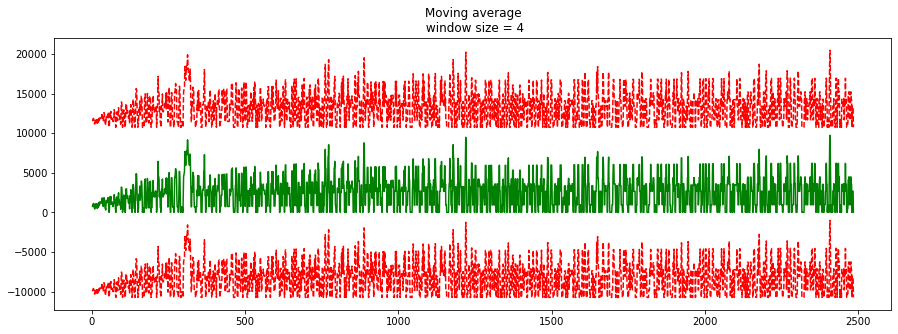

In [20]:
plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)

AttributeError: 'Series' object has no attribute 'columns'

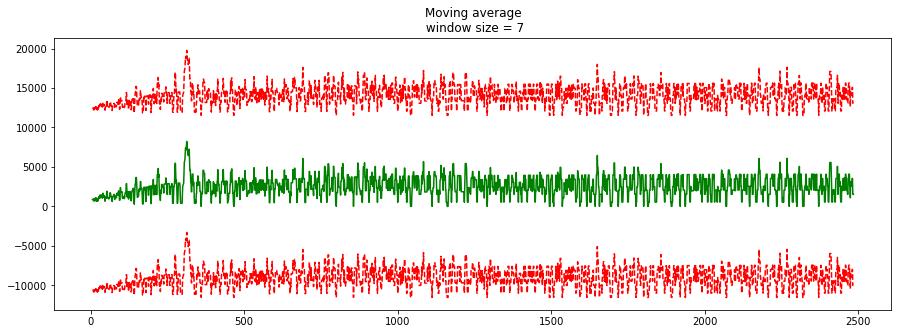

In [21]:
plotMovingAverage(ads.confirmed, 7, plot_intervals=True, plot_anomalies=True) # weekly smoothing

In [22]:
def weighted_average(series, weights):
    """
        Calculate weighter average on series
    """
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [23]:
weighted_average(ads.confirmed, [0.6, 0.3, 0.1])

9.4

In [24]:
# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(ads.confirmed.copy())
data.columns = ["y"]

In [25]:
for i in range(6, 25):
    data["Date_{}".format(i)] = data.y.shift(i)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

NameError: name 'TimeSeriesSplit' is not defined

In [27]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [28]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

NameError: name 'tscv' is not defined

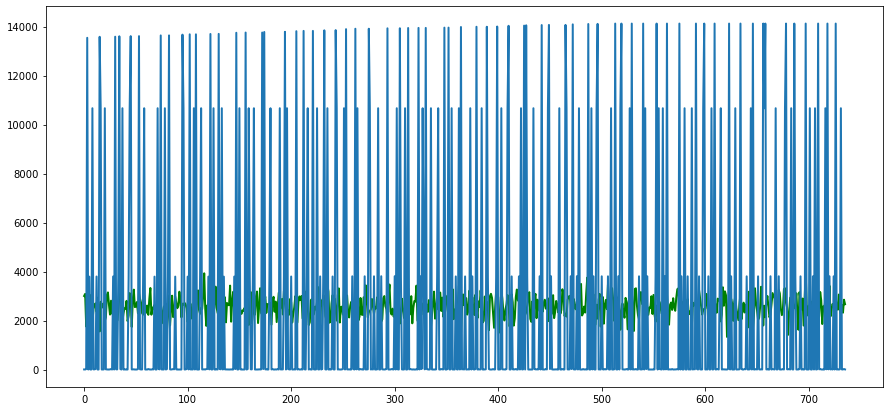

In [31]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

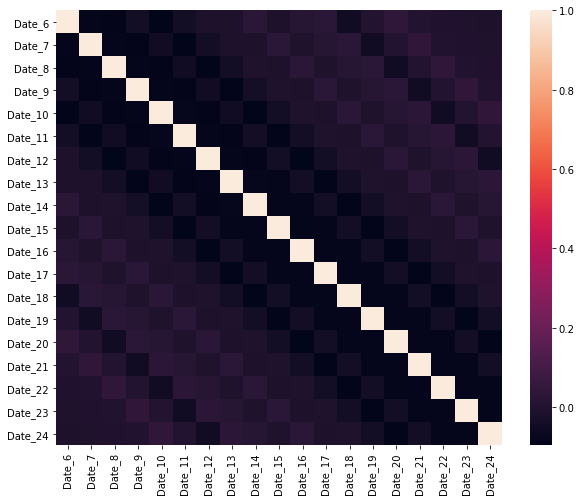

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

NameError: name 'tscv' is not defined

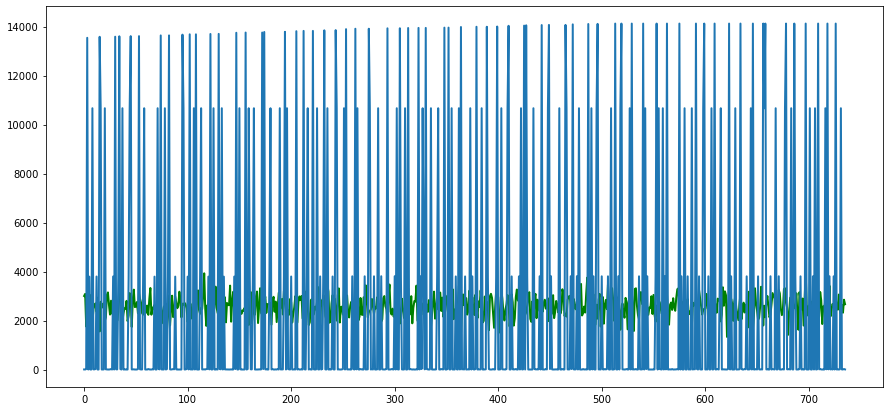

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

In [34]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

NameError: name 'xgb' is not defined

In [35]:

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

dataset = df
dataset

,Date,Country,confirmed,death,days_dif,start date,year,month
0,2014-08-29,Guinea,648.0,430,0,8/29/2014,2014,Aug
1,2014-08-29,Nigeria,19.0,7,0,8/29/2014,2014,Aug
2,2014-08-29,Sierra Leone,1026.0,422,0,8/29/2014,2014,Aug
3,2014-08-29,Liberia,1378.0,694,0,8/29/2014,2014,Aug
4,2014-09-05,Sierra Leone,1261.0,491,7,8/29/2014,2014,Sep
...,...,...,...,...,...,...,...,...
2480,2016-03-23,Liberia,10666.0,4806,572,8/29/2014,2016,Mar
2481,2016-03-23,Italy,1.0,0,572,8/29/2014,2016,Mar
2482,2016-03-23,Liberia,5.0,4,572,8/29/2014,2016,Mar
2483,2016-03-23,Nigeria,20.0,8,572,8/29/2014,2016,Mar


In [36]:
dataset= dataset.dropna()

world_cases = np.array(dataset.confirmed).reshape(-1, 1)
total_deaths = np.array(dataset.death).reshape(-1, 1)
total_days = np.array(dataset.days_dif).reshape(-1, 1)
#world_cases =world_cases.dropna()
#total_deaths = total_deaths.dropna()
model = GaussianNB()
model.fit(world_cases, total_deaths )

expected = total_deaths
predicted = model.predict(world_cases)

In [37]:

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       858
           1       0.98      0.97      0.97       253
           2       0.94      0.98      0.96        86
           3       0.86      0.92      0.89        13
           4       0.00      0.00      0.00         2
           5       0.12      0.50      0.20         2
           6       1.00      1.00      1.00       231
           7       1.00      1.00      1.00         1
           8       1.00      0.98      0.99       254
         422       1.00      1.00      1.00         1
         430       1.00      1.00      1.00         1
         491       1.00      1.00      1.00         1
         509       1.00      1.00      1.00         1
         517       1.00      1.00      1.00         1
         524       1.00      1.00      1.00         1
         555       1.00      1.00      1.00         1
         557       1.00      1.00      1.00         1
         562       1.00    

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Ebola/ebola_2014_2016_clean2.csv', parse_dates=['Date'], index_col='Date')
df

,Country,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths",days_dif,start date
Date,,,,,
2014-08-29,Guinea,648.0,430,0,8/29/2014
2014-08-29,Nigeria,19.0,7,0,8/29/2014
2014-08-29,Sierra Leone,1026.0,422,0,8/29/2014
2014-08-29,Liberia,1378.0,694,0,8/29/2014
2014-09-05,Sierra Leone,1261.0,491,7,8/29/2014
...,...,...,...,...,...
2016-03-23,Liberia,10666.0,4806,572,8/29/2014
2016-03-23,Italy,1.0,0,572,8/29/2014
2016-03-23,Liberia,5.0,4,572,8/29/2014


In [39]:
df = df.dropna()
df.rename(columns={'Cumulative no. of confirmed, probable and suspected cases': 'confirmed', 'Cumulative no. of confirmed, probable and suspected deaths': 'death'}, inplace=True)
x = df['death']
y = df['confirmed']
z = df['days_dif']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [40]:
model = GaussianNB()
x_train= np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
days_dif = np.array(z).reshape(-1, 1)
model.fit(x_train, y_train)

GaussianNB()

In [41]:
y_pred = model.predict(x_test)
y_pred

array([3.7920e+03, 1.1155e+04, 2.0000e+01, 1.0000e+00, 1.0000e+00,
       1.4122e+04, 1.0000e+00, 1.0000e+00, 1.0564e+04, 3.6520e+03,
       1.2932e+04, 7.0000e+00, 6.5350e+03, 3.7540e+03, 1.0666e+04,
       1.0000e+00, 8.0000e+00, 1.0934e+04, 3.7840e+03, 4.0000e+00,
       1.0000e+00, 3.8070e+03, 2.0000e+01, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 3.7860e+03, 9.3430e+03, 1.2696e+04, 1.0000e+00,
       1.0000e+00, 1.1696e+04, 1.0000e+00, 2.0000e+01, 8.0000e+00,
       1.0000e+00, 8.0000e+00, 7.9770e+03, 3.7840e+03, 1.2965e+04,
       1.0666e+04, 8.6430e+03, 8.0000e+00, 4.0000e+00, 3.7840e+03,
       8.0000e+00, 1.0000e+00, 1.9190e+03, 1.0000e+00, 1.0666e+04,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 7.0000e+00, 9.8620e+03,
       4.0000e+00, 1.1841e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 2.0000e+01, 2.0000e+01, 2.0000e+01,
       7.0000e+00, 1.0000e+00, 4.0000e+00, 1.0666e+04, 4.0000e+00,
       1.0000e+00, 1.0000e+00, 4.0000e+00, 2.0000e+01, 2.0000e

In [42]:
accuracy = accuracy_score(y_test, y_pred)*100

In [43]:
accuracy

78.54838709677419

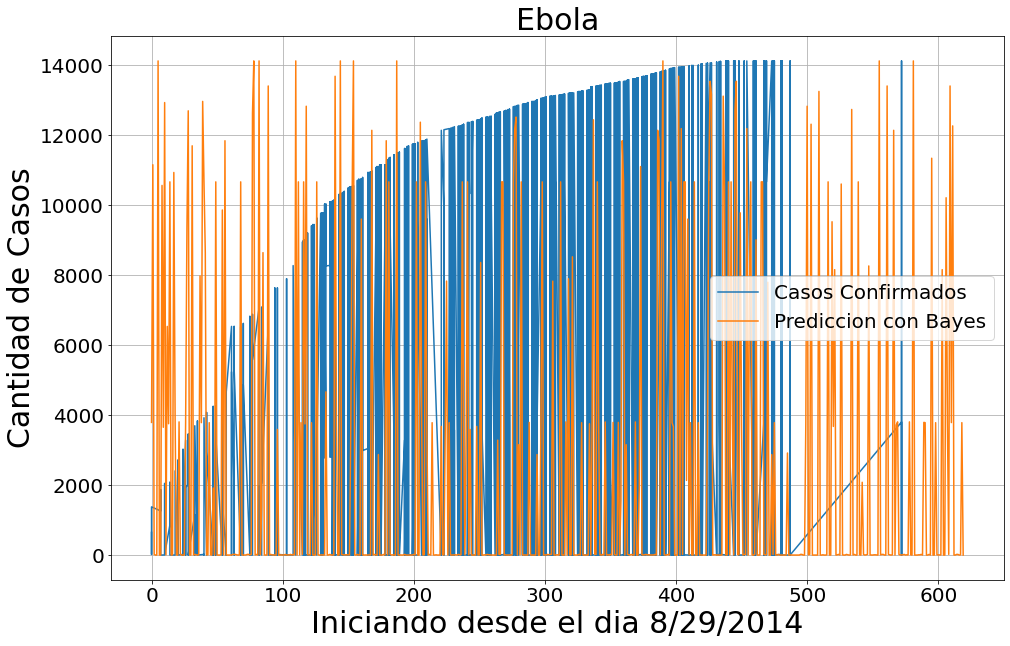

In [44]:
plt.figure(figsize=(16, 10))
plt.plot(df['days_dif'],  df['confirmed'])
plt.plot(y_pred)
plt.title('Predicciones con Bayes')
plt.title('Ebola', size=30)
plt.xlabel('Iniciando desde el dia 8/29/2014', size=30)
plt.ylabel('Cantidad de Casos', size=30)
plt.legend(['Casos Confirmados', 'Prediccion con Bayes'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True)
plt.show()

In [45]:
future_forcast = np.array([i for i in range(len(x)+50)]).reshape(-1, 1)
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Ebola', size=30)
    plt.xlabel('Iniciando desde el dia 8/29/2014', size=30)
    plt.ylabel('Cantidad de Casos', size=30)
    plt.legend(['Casos Confirmados', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()


In [46]:
x_train

array([[   8],
       [3951],
       [3953],
       ...,
       [3912],
       [3932],
       [2374]], dtype=int64)

In [47]:
y_train

array([[   20.],
       [13470.],
       [13756.],
       ...,
       [12859.],
       [13119.],
       [ 3585.]])

In [48]:
y_pred

array([3.7920e+03, 1.1155e+04, 2.0000e+01, 1.0000e+00, 1.0000e+00,
       1.4122e+04, 1.0000e+00, 1.0000e+00, 1.0564e+04, 3.6520e+03,
       1.2932e+04, 7.0000e+00, 6.5350e+03, 3.7540e+03, 1.0666e+04,
       1.0000e+00, 8.0000e+00, 1.0934e+04, 3.7840e+03, 4.0000e+00,
       1.0000e+00, 3.8070e+03, 2.0000e+01, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 3.7860e+03, 9.3430e+03, 1.2696e+04, 1.0000e+00,
       1.0000e+00, 1.1696e+04, 1.0000e+00, 2.0000e+01, 8.0000e+00,
       1.0000e+00, 8.0000e+00, 7.9770e+03, 3.7840e+03, 1.2965e+04,
       1.0666e+04, 8.6430e+03, 8.0000e+00, 4.0000e+00, 3.7840e+03,
       8.0000e+00, 1.0000e+00, 1.9190e+03, 1.0000e+00, 1.0666e+04,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 7.0000e+00, 9.8620e+03,
       4.0000e+00, 1.1841e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 2.0000e+01, 2.0000e+01, 2.0000e+01,
       7.0000e+00, 1.0000e+00, 4.0000e+00, 1.0666e+04, 4.0000e+00,
       1.0000e+00, 1.0000e+00, 4.0000e+00, 2.0000e+01, 2.0000e

In [49]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(total_days[50:], world_cases[50:], test_size=0.05, shuffle=False)

In [ ]:
from sklearn.svm import SVR
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [ ]:
future_forcast

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_confirmed, y_train_confirmed) 
clf = MLPClassifier(hidden_layer_sizes=(4, 4, 4), max_iter=15)
clf.fit(X_train_confirmed, y_train_confirmed)
predictneural = clf.predict(X_train_confirmed)
plt.plot(y_train_confirmed)
plt.plot(predictneural)
plt.legend(['Original Data', 'Neural Network Predictions'])
neuronal_pred = clf.predict(future_forcast)
scores = cross_val_score(clf, X_train_confirmed, predictneural, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

valor = scores.mean()
print("scores mean" + str(valor*100))

In [ ]:
plot_predictions(total_days, world_cases, svm_pred, 'Predicciones de SVM', 'purple')
plot_predictions(total_days, world_cases, linear_pred, 'Predicciones de Regresion Polinomeal', 'orange')
plot_predictions(total_days, world_cases, bayesian_pred, 'Predicciones de regresión de la cresta bayesiana', 'green')
plot_predictions(total_days, world_cases, neuronal_pred, 'Predicciones de Redes Neuronales', 'green')

In [ ]:
linear_pred

In [ ]:
bayesian_pred

In [ ]:
y_train_confirmed

In [ ]:
plt.plot(y_train_confirmed)

In [ ]:
ebola= pd.read_csv('Ebola/ebola_2014_2016_clean2.csv')
ebola.rename(columns={'Cumulative no. of confirmed, probable and suspected cases': 'confirmed', 'Cumulative no. of confirmed, probable and suspected deaths': 'death'}, inplace=True)
ebola.groupby(ebola.Date).sum()


In [ ]:
import pandas as pd
#plot_df(ebola, x=ebola.index, y=ebola.death, title='Serie de Tiempo para casos de mortalidad de Ebola')
ebola['Date'] =pd.to_datetime(ebola.Date)
ebola_withoud_country = ebola.groupby(ebola.Date).sum()
ebola_withoud_country 
plot_df(ebola_withoud_country, x=ebola_withoud_country.index, y=ebola_withoud_country.death, title='Serie de Tiempo para Ebola General')


In [ ]:
x = ebola_withoud_country['death']
future_forcast = np.array([i for i in range(len(x)+50)]).reshape(-1, 1)
world_cases = np.array(ebola_withoud_country.confirmed).reshape(-1, 1)
total_deaths = np.array(ebola_withoud_country.death).reshape(-1, 1)
total_days = np.array(ebola_withoud_country.days_dif).reshape(-1, 1)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(total_days[10:], world_cases[10:], test_size=0.05, shuffle=False)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_confirmed, y_train_confirmed) 
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000000000000)
clf.fit(X_train_confirmed, y_train_confirmed)
predictneural = clf.predict(X_train_confirmed)
plt.plot(y_train_confirmed)
plt.plot(predictneural)
plt.legend(['Original Data', 'Neural Network Predictions'])
neuronal_pred = clf.predict(future_forcast)

        

In [ ]:
scores = cross_val_score(clf, X_train_confirmed, predictneural, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

valor = scores.mean()
print("scores mean" + str(valor*100))

In [ ]:
scores = cross_val_score(clf, X_train_confirmed, predictneural, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

valor = scores.mean()
print("scores mean" + str(valor*100))

In [ ]:
neuronal_save = neuronal_pred
neuronal_save2= predictneural

In [ ]:
from sklearn.svm import SVR
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

from sklearn.model_selection import RandomizedSearchCV, train_test_split
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))
scores = cross_val_score(clf, test_bayesian_pred,y_test_confirmed, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

valor = scores.mean()
print("scores mean" + str(valor*100))



In [ ]:
plot_predictions(total_days, world_cases, svm_pred, 'Predicciones de SVM', 'purple')
plot_predictions(total_days, world_cases, linear_pred, 'Predicciones de Regresion Polinomeal', 'orange')
plot_predictions(total_days, world_cases, bayesian_pred, 'Predicciones de regresión de la cresta bayesiana', 'green')
plot_predictions(total_days, world_cases, neuronal_pred, 'Predicciones de Redes Neuronales', 'green')